# MATH 4100-001 Final Project

# Group 22

# Project title:  Investigating the Impacts of Climate Change and Marine Economy on U.S. Fisheries 

Team Members: 
Yueqin Yang, yueqin.yang@hsc.utah.edu, u0737683 
Jackie Bearnson, u0763123@umail.utah.edu, u0763123 
Siwei Zhou, u1421984@umail.utah.edu,u1421984    


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [2]:
#read csv file
df = pd.read_csv('Major_species_Cleaned_04192023.csv')
#drop NA
df = df.dropna()

In [3]:
#select only the columns after the 8th column, since column 1 to 7 are the groups, 8th and after are species, 
#for we will do fish species clustering below
fish_species = df.iloc[:, 7:]

In [4]:
# Transpose the DataFrame and set the column names as the index
df_transposed = fish_species.T
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,61,62
Albacore,16423.5,7822.50000,11920.00000,6123.0,6964.5,9375.50000,10582.500000,8719.00000,10497.0,9117.500000,...,1881.000000,1747.285714,1651.285714,1811.142857,3033.5,3159.250000,3767.25,2794.2,3116.25,2788.5
Alewife,10733.5,13085.50000,10515.00000,11844.5,10703.0,12137.00000,8700.666667,11529.66667,7733.0,8103.666667,...,232.333333,137.666667,213.666667,250.666667,405.0,30.500000,10.00,6.0,3.00,2.0
Amer. plaice(=Long rough dab),3082.0,5154.00000,3467.00000,2590.0,2951.0,2679.00000,2201.000000,1342.00000,1423.0,1376.000000,...,1106.000000,991.000000,1104.000000,1395.000000,1413.0,1387.000000,1481.00,1317.0,1298.00,1113.0
American angler,37.0,80.00000,38.00000,24.0,24.0,23.00000,15.000000,19.00000,20.0,19.000000,...,7291.500000,6169.000000,5591.500000,4360.500000,7433.0,8689.000000,9758.00,8597.0,8623.00,9034.0
American cupped oyster,139027.5,127869.50000,142842.50000,137701.5,121333.5,115478.00000,109647.000000,100098.00000,88826.0,78863.500000,...,22485.500000,36521.500000,25967.500000,30850.000000,21462.0,35473.500000,28716.00,28817.0,28818.50,44718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whitefishes nei,4971.0,4971.00000,5466.00000,5178.0,5461.0,5533.00000,5448.000000,6331.00000,5686.0,8241.000000,...,836.000000,547.000000,333.000000,221.000000,108.0,76.000000,44.00,43.0,81.00,75.0
Winter flounder,12513.0,9318.00000,8602.00000,6181.0,5982.0,7180.00000,7165.000000,7481.00000,7674.0,9062.000000,...,2745.000000,2667.000000,2311.000000,2209.000000,1587.0,2124.000000,2394.00,2740.0,1701.00,1162.0
Witch flounder,3189.0,2725.00000,2617.00000,4573.0,3993.0,2401.00000,2003.000000,1405.00000,1333.0,1420.000000,...,1863.000000,1069.000000,1000.000000,949.000000,759.0,870.000000,1038.00,686.0,491.00,398.0
Yellowfin tuna,42613.0,24468.33333,27099.66667,27083.5,27943.5,22869.66667,20851.333330,18802.00000,24762.5,86030.000000,...,1966.333333,1948.166667,1646.000000,1821.833333,4941.4,4253.166667,7519.00,3900.6,4498.80,4116.6


In [5]:
#with fish species as index
#df_transposed.index

In [6]:
#Scale the dataset using the scale function of the sklearn.preprocessing library for clustering.
df_scaled = scale(df_transposed)
df_scaled

array([[ 0.05860151, -0.20426257, -0.10034976, ..., -0.31120488,
        -0.2811035 , -0.2521808 ],
       [-0.12776293, -0.03645259, -0.1362346 , ..., -0.35429064,
        -0.32532288, -0.29101539],
       [-0.37837233, -0.28934731, -0.31624623, ..., -0.3340319 ,
        -0.30692921, -0.27553172],
       ...,
       [-0.37486776, -0.36679562, -0.33795592, ..., -0.34378267,
        -0.31839152, -0.28549646],
       [ 0.91638561,  0.3264874 ,  0.28735122, ..., -0.2941078 ,
        -0.26146631, -0.23367148],
       [-0.12106494, -0.18712446, -0.20800428, ..., -0.33465001,
        -0.30840639, -0.27221479]])

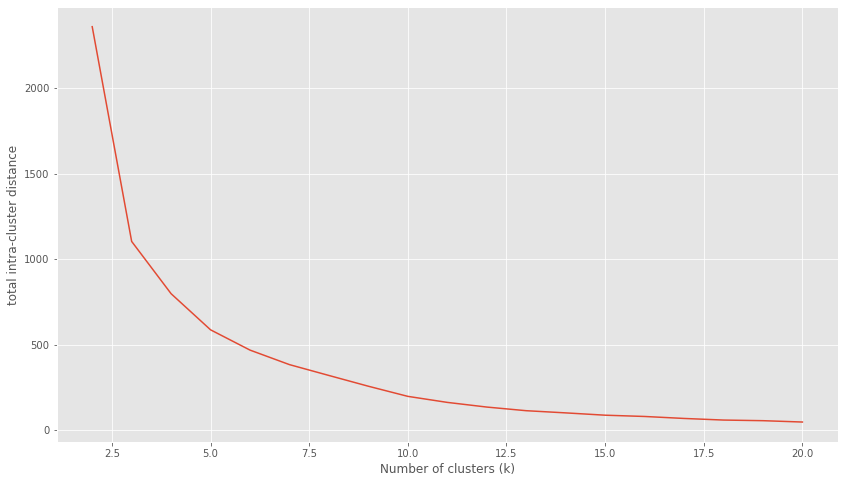

In [7]:
#k-means cluster analysis to cluster the fish species, vary k (between 2 and 20) and check if there could be a better value for k. 
# clustering for k = 2 to k = 20
ks = range(2,21)
scores = []
for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df_scaled)
    scores.append(-model.score(df_scaled))

fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('total intra-cluster distance')
plt.show()


Iterpretation for best K: We can see that the total intra-cluster distance is large for 𝑘=1 and decreases as we Increase 𝑘 , until 𝑘=3, after which it tapers of and gets only marginally smaller. 
This indicates that 𝑘=3 is a good choice.

In [8]:
# Using k-means, cluster the fish into 3 clusters. Use the scaled dataset. Which species belong to which clusters?
# Cluster the states into 3 clusters using k-means
cluster_labels  = KMeans(n_clusters=3).fit_predict(df_scaled)


# Print the fish species belonging to each cluster
print("Fish species in Cluster 0:")
print(df_transposed.index[cluster_labels == 0])
print("\Fish species in Cluster 1:")
print(df_transposed.index[cluster_labels == 1])
print("\Fish species in Cluster 2:")
print(df_transposed.index[cluster_labels == 2])


Fish species in Cluster 0:
Index(['Albacore', 'Alewife', 'Amer. plaice(=Long rough dab)',
       'American angler', 'American eel', 'American gizzard shad',
       'American lobster', 'American shad', 'American yellow perch',
       'Atlantic Spanish mackerel', 'Atlantic bay scallop',
       'Atlantic bluefin tuna', 'Atlantic cod', 'Atlantic croaker',
       'Atlantic halibut', 'Atlantic mackerel', 'Atlantic rock crab',
       'Atlantic searobins', 'Black drum', 'Black seabass', 'Black stone crab',
       'Blue crab', 'Blue mussel', 'Blue runner', 'Bluefish',
       'Buffalofishes nei', 'Californian anchovy', 'Caribbean spiny lobster',
       'Catfishes nei', 'Chinook(=Spring=King) salmon',
       'Chum(=Keta=Dog) salmon', 'Clams, etc. nei', 'Coho(=Silver) salmon',
       'Common carp', 'Dungeness crab', 'Euro-American crayfishes nei',
       'Finfishes nei', 'Flatfishes nei', 'Freshwater fishes nei',
       'Great Northern tilefish', 'Grunts, sweetlips nei', 'Haddock',
       'King ma

In [9]:
#Check silhouette score to evaluate the clustering by K means above
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.7823306593396685


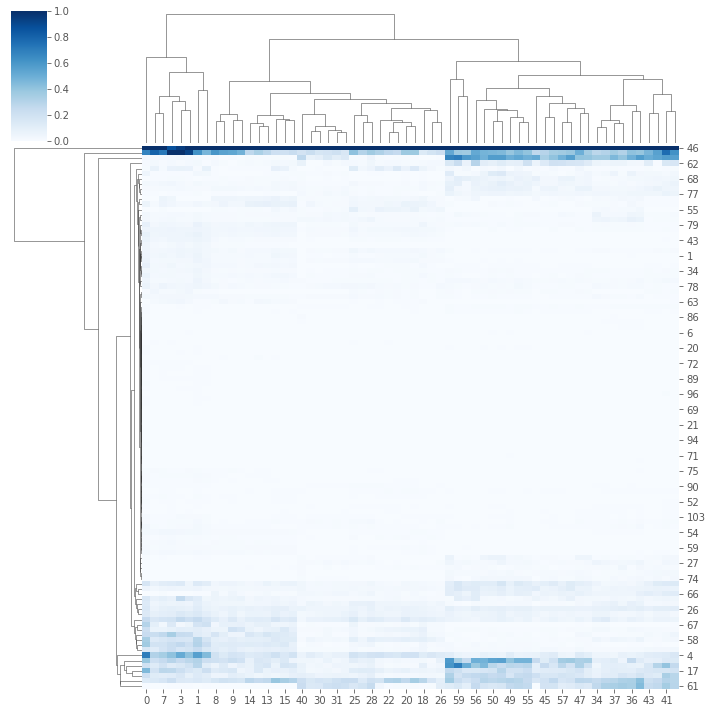

In [10]:
# Generate the clustermap by the "average" linkage method and the distance metric used in this clustering is "euclidean"
sns.clustermap(df_scaled,method="average", metric="euclidean", cmap='Blues', standard_scale=1)

In [11]:
# Use AgglomerativeClustering mode,which use the same linkage method and distance metric as above seaborn.clustermap() function, 3 clusters
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=3)
cluster_labels2 = agg_cluster_model.fit_predict(df_scaled)

# Print the fish species belonging to each cluster
print("Fish species in Cluster 0:")
print(df_transposed.index[cluster_labels2 == 0])
print("\Fish species in Cluster 1:")
print(df_transposed.index[cluster_labels2 == 1])
print("\Fish species in Cluster 2:")
print(df_transposed.index[cluster_labels2 == 2])


Fish species in Cluster 0:
Index(['Albacore', 'Alewife', 'Amer. plaice(=Long rough dab)',
       'American angler', 'American cupped oyster', 'American eel',
       'American gizzard shad', 'American lobster', 'American sea scallop',
       'American shad',
       ...
       'Various squids nei', 'Whelks', 'White hake', 'White perch',
       'White weakfish', 'Whitefishes nei', 'Winter flounder',
       'Witch flounder', 'Yellowfin tuna', 'Yellowtail flounder'],
      dtype='object', length=104)
\Fish species in Cluster 1:
Index(['Gulf menhaden'], dtype='object')
\Fish species in Cluster 2:
Index(['Atlantic menhaden'], dtype='object')


In [12]:
#Check silhouette score to evaluate the clustering by agglomerative approach above
silhouette_avg = silhouette_score(df_scaled, cluster_labels2)
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.8383299841914432


In [13]:
#Visualize the data using PCA
#Calculate the principal components of the dataset.
#Store the principal components in a pandas dataframe. 
#Index of this dataframe should be the names of the fish species)
pca_model = PCA()
X_PCA = pca_model.fit_transform(df_scaled)
# create a dataframe of the principal components
#pcs_df = pd.DataFrame(X_PCA, index=df.index)
X_PCA
pcs_df = pd.DataFrame(X_PCA, index=df_transposed.index)

[8.69054612e-01 6.50143386e-02 3.54915460e-02 9.63443165e-03
 3.85181594e-03 3.78333166e-03 3.46440770e-03 2.21429246e-03
 1.93468644e-03 9.80687427e-04 8.72138859e-04 8.32077125e-04
 5.59685062e-04 4.80676223e-04 3.21586763e-04 2.43388916e-04
 2.33921192e-04 1.63357249e-04 1.37186234e-04 1.16946673e-04
 1.00215012e-04 7.78552946e-05 6.78884064e-05 6.13232701e-05
 4.81531386e-05 4.03330796e-05 3.34499698e-05 2.98571034e-05
 2.29330635e-05 2.21450927e-05 1.65163451e-05 1.40165892e-05
 1.18101527e-05 1.09689572e-05 7.85536945e-06 6.64420067e-06
 6.08943219e-06 5.19520749e-06 4.73125790e-06 4.11896884e-06
 3.74808219e-06 2.77499499e-06 2.54642155e-06 2.19780698e-06
 1.96885572e-06 1.89032430e-06 1.27823139e-06 1.10973034e-06
 9.03905979e-07 8.51364260e-07 7.07897413e-07 5.43724489e-07
 4.75232021e-07 4.27049662e-07 3.35323338e-07 2.86985852e-07
 2.63201916e-07 1.93099244e-07 1.00131834e-07 8.07376258e-08
 5.71202548e-08 4.59606602e-08]


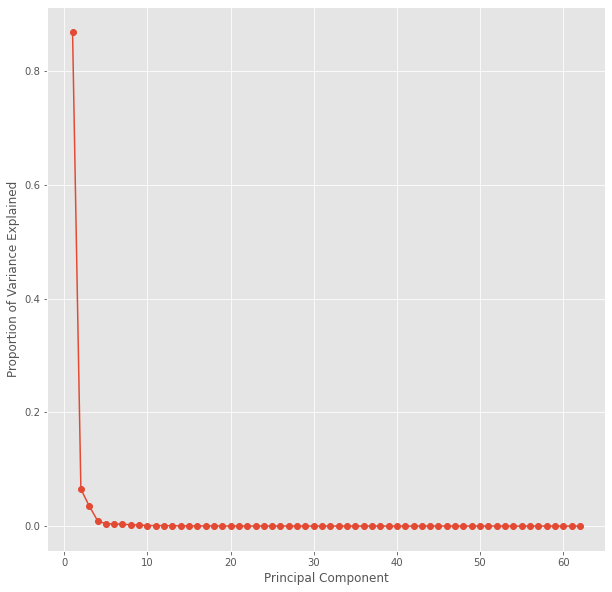

In [14]:
#Print the explained variance ratio of the PCA. Plot the explained variance ratio of the PCA. 
print(pca_model.explained_variance_ratio_)
plt.plot(range(1, 63), pca_model.explained_variance_ratio_, "-o")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.show()

Explained variance ratio of the PCA:
The first principal component (PC1) explains approximately 86.9% of the total variance in the dataset.
The second principal component (PC2) explains approximately 6.5% of the total variance.
The third principal component (PC3) explains approximately 3.5% of the total variance.
And so on for the remaining principal components. When performing PCA, it is common to select a subset of the principal components that explain a significant portion of the total variance, which can then be used for dimensionality reduction or other purposes.

By examining a scree plot,  which also helped us to identify an "elbow point," where the explained variance ratio starts to decrease less dramatically at PC4, indicating that the remaining principal components contribute less to the overall variance.

PC1 + PC2: 86.9% + 6.5% = 93.4% of the total variance
PC1 + PC2 + PC3: 86.9% + 6.5% + 3.5% = 96.9% of the total variance

So in our case, We choose to retain only the first three principal components, as they cumulatively explain a significant portion of the variance:

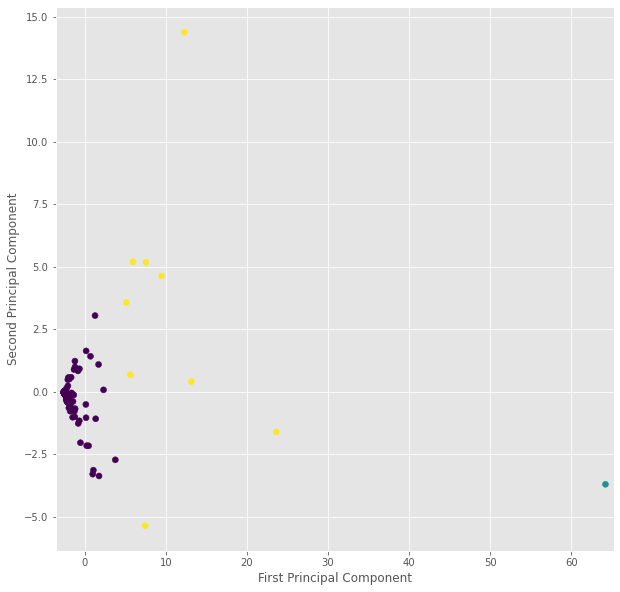

In [15]:
#Plot a scatterplot of PC1 and PC2.
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=cluster_labels,  marker="o"); 

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()
    

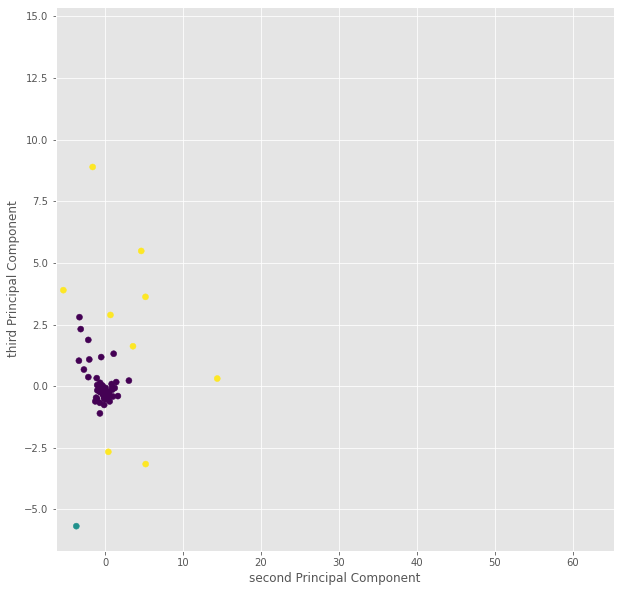

In [16]:
#Plot a scatterplot of PC2 and PC3. 
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,1].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,2].min()-1,X_PCA[:,1].max()+1)

plt.scatter(X_PCA[:, 1], X_PCA[:, 2], c=cluster_labels,  marker="o"); 

ax1.set_xlabel('second Principal Component')
ax1.set_ylabel('third Principal Component')
plt.show()
    

In [17]:
# so we have 2 different model made 3 clusters for the fish species
#We next want to compare them and get the overlapping clusters, and use that to be the model dependent variables.
import numpy as np

# Assuming you have the cluster assignments for both models
labels_model1 = cluster_labels
labels_model2 = cluster_labels2

def find_overlapping_clusters_same_index(df_transposed, labels1, labels2, n_clusters=3):
    overlap_clusters = {}
    
    for i in range(n_clusters):
        cluster_indices_model1 = set(df_transposed.index[labels1 == i])
        cluster_indices_model2 = set(df_transposed.index[labels2 == i])
        
        intersection = cluster_indices_model1.intersection(cluster_indices_model2)
        if intersection:
            overlap_clusters[f"Model 1 cluster {i}, Model 2 cluster {i}"] = intersection
                
    return overlap_clusters

overlapping_clusters = find_overlapping_clusters_same_index(df_transposed, labels_model1, labels_model2)

print("Overlapping clusters:")
for key, value in overlapping_clusters.items():
    print(f"{key}: {value}")


Overlapping clusters:
Model 1 cluster 0, Model 2 cluster 0: {'Sablefish', 'Sand gaper', 'Sheepshead', 'Pacific halibut', 'Skipjack tuna', 'Opalescent inshore squid', 'Chum(=Keta=Dog) salmon', 'Silver hake', 'Rainbow smelt', 'Blue mussel', 'Saithe(=Pollock)', 'Spot croaker', 'Winter flounder', 'Atlantic searobins', 'Yellowfin tuna', 'Chinook(=Spring=King) salmon', 'Scorpionfishes, redfishes nei', 'Striped bass', 'Catfishes nei', 'Atlantic croaker', 'Marine fishes nei', 'Lake cisco', 'White perch', 'Common carp', 'American shad', 'Flatfishes nei', 'Rays and skates nei', 'Lake(=Common) whitefish', 'Lake trout(=Char)', 'Lingcod', 'Natantian decapods nei', 'Pacific bluefin tuna', 'Atlantic bay scallop', 'Finfishes nei', 'American yellow perch', 'Albacore', 'Black stone crab', 'Various squids nei', 'Haddock', 'Pacific jack mackerel', 'American gizzard shad', 'Northern pink shrimp', 'Witch flounder', 'Great Northern tilefish', 'Whitefishes nei', 'Freshwater fishes nei', 'Black seabass', 'Euro

In [18]:
#choose 'Atlantic menhaden', 'Gulf menhaden',"Dungeness crab" "Pacific halibut" as representative for each cluster
#merge this column to predictors
df_final = pd.read_csv('merged_depth1_calco_CPI_PPI_Major_species_Cleaned_04182023.csv')
#select only predictors 'T_degC', 'Salnty', 'O2Sat', 'Oxy_µmol/Kg', 'PO4uM', 'SiO3uM', 'CPI', and only 5 fish species 
df_final_used_features = df_final[['Year','T_degC', 'Salnty', 'O2Sat', 'Oxy_µmol/Kg', 'PO4uM', 'SiO3uM', 'CPI', 'AMPHIBIA, REPTILIA','CRUSTACEA','INVERTEBRATA AQUATICA', 'MAMMALIA','MOLLUSCA','PISCES','PLANTAE AQUATICAE','Atlantic menhaden', 'Gulf menhaden','Dungeness crab','Pacific halibut','Pacific cod']]
df_final_used_features

,Year,T_degC,Salnty,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,CPI,"AMPHIBIA, REPTILIA",CRUSTACEA,INVERTEBRATA AQUATICA,MAMMALIA,MOLLUSCA,PISCES,PLANTAE AQUATICAE,Atlantic menhaden,Gulf menhaden,Dungeness crab,Pacific halibut,Pacific cod
0,1950,19.540000,33.170000,94.100000,216.212200,NaN,NaN,19.366667,316.6,9864.941176,88.322222,3344.666667,18205.666670,7320.584314,50788.5,134041.5,197452,5400.0,2825.0,3215
1,1951,14.220000,NaN,NaN,NaN,NaN,NaN,22.125000,304.0,9932.888889,52.188889,3387.555556,17669.925930,6530.910506,57999.0,141680.0,227874,5409.0,3533.0,4340
2,1952,19.330000,33.490000,NaN,NaN,NaN,NaN,21.541667,93.2,9635.444444,54.777778,3548.333333,17679.714290,6583.206226,55626.0,152126.0,323341,5161.5,4139.5,4919
3,1954,18.525000,33.535000,104.250000,245.060850,NaN,NaN,20.841667,46.8,10755.333330,30.777778,3549.000000,16473.214290,7248.035573,53464.5,267364.0,253518,5838.0,5588.0,7553
4,1955,17.746608,33.760167,101.744078,234.134475,0.488889,NaN,20.400000,69.6,10052.777780,38.555556,3637.222222,17655.076920,7364.206349,62282.0,275715.5,295790,4524.5,5083.0,5883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2012,14.409048,33.437214,104.440476,264.761412,0.445476,3.842857,266.651917,163304.5,6982.309091,404.192308,15.081967,10585.431030,7094.905759,3511.5,224460.0,578751,24538.0,15075.0,325815
59,2013,14.802687,33.515428,100.819589,253.645593,0.522250,4.472000,273.255500,240682.0,6305.603448,659.461538,9.229508,8441.772727,6933.946037,4035.0,167580.0,440707,40069.0,13357.0,309491
60,2014,17.047156,33.443654,104.725111,251.996307,0.303778,2.782444,289.006833,242968.0,6379.140351,723.769231,10.163934,7739.676923,6732.609635,2439.0,174032.0,385022,25013.0,10142.0,325483
61,2015,19.617633,33.416097,105.372000,242.231617,0.295333,2.495667,286.308083,214275.0,6535.909091,423.791667,7.192308,6971.111111,7144.981197,1544.5,200163.0,539471,10943.0,10725.0,317544


In [19]:
#df_final_used_features['Year'] = df_final_used_features['Year'].astype(int)
df_final_used_features = df_final_used_features.set_index('Year')
df_final_used_features

,T_degC,Salnty,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,CPI,"AMPHIBIA, REPTILIA",CRUSTACEA,INVERTEBRATA AQUATICA,MAMMALIA,MOLLUSCA,PISCES,PLANTAE AQUATICAE,Atlantic menhaden,Gulf menhaden,Dungeness crab,Pacific halibut,Pacific cod
Year,,,,,,,,,,,,,,,,,,,
1950,19.540000,33.170000,94.100000,216.212200,NaN,NaN,19.366667,316.6,9864.941176,88.322222,3344.666667,18205.666670,7320.584314,50788.5,134041.5,197452,5400.0,2825.0,3215
1951,14.220000,NaN,NaN,NaN,NaN,NaN,22.125000,304.0,9932.888889,52.188889,3387.555556,17669.925930,6530.910506,57999.0,141680.0,227874,5409.0,3533.0,4340
1952,19.330000,33.490000,NaN,NaN,NaN,NaN,21.541667,93.2,9635.444444,54.777778,3548.333333,17679.714290,6583.206226,55626.0,152126.0,323341,5161.5,4139.5,4919
1954,18.525000,33.535000,104.250000,245.060850,NaN,NaN,20.841667,46.8,10755.333330,30.777778,3549.000000,16473.214290,7248.035573,53464.5,267364.0,253518,5838.0,5588.0,7553
1955,17.746608,33.760167,101.744078,234.134475,0.488889,NaN,20.400000,69.6,10052.777780,38.555556,3637.222222,17655.076920,7364.206349,62282.0,275715.5,295790,4524.5,5083.0,5883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,14.409048,33.437214,104.440476,264.761412,0.445476,3.842857,266.651917,163304.5,6982.309091,404.192308,15.081967,10585.431030,7094.905759,3511.5,224460.0,578751,24538.0,15075.0,325815
2013,14.802687,33.515428,100.819589,253.645593,0.522250,4.472000,273.255500,240682.0,6305.603448,659.461538,9.229508,8441.772727,6933.946037,4035.0,167580.0,440707,40069.0,13357.0,309491
2014,17.047156,33.443654,104.725111,251.996307,0.303778,2.782444,289.006833,242968.0,6379.140351,723.769231,10.163934,7739.676923,6732.609635,2439.0,174032.0,385022,25013.0,10142.0,325483


In [20]:
# loop over each column and fill NA values with median
for column in df_final_used_features.columns:
    median = df_final_used_features[column].median()
    df_final_used_features[column].fillna(median, inplace=True)

print(df_final_used_features)


         T_degC     Salnty       O2Sat  Oxy_µmol/Kg     PO4uM    SiO3uM  \
Year                                                                      
1950  19.540000  33.170000   94.100000   216.212200  0.377392  2.961523   
1951  14.220000  33.481013  104.140097   254.261545  0.377392  2.961523   
1952  19.330000  33.490000  104.140097   254.261545  0.377392  2.961523   
1954  18.525000  33.535000  104.250000   245.060850  0.377392  2.961523   
1955  17.746608  33.760167  101.744078   234.134475  0.488889  2.961523   
...         ...        ...         ...          ...       ...       ...   
2012  14.409048  33.437214  104.440476   264.761412  0.445476  3.842857   
2013  14.802687  33.515428  100.819589   253.645593  0.522250  4.472000   
2014  17.047156  33.443654  104.725111   251.996307  0.303778  2.782444   
2015  19.617633  33.416097  105.372000   242.231617  0.295333  2.495667   
2016  17.403500  33.418827  107.088315   259.232234  0.310842  2.295446   

             CPI  AMPHIB

In [21]:
# change column name so no space there
df_final_used_features = df_final_used_features.rename(columns={
    "AMPHIBIA, REPTILIA":"AMPHIBIA_REPTILIA",
    "INVERTEBRATA AQUATICA":"INVERTEBRATA_AQUATICA",
    "PLANTAE AQUATICAE":"PLANTAE_AQUATICAE",
    "Atlantic menhaden": "Atlantic_menhaden",
    "Gulf menhaden": "Gulf_menhaden",
    "Dungeness crab":"Dungeness_crab",
    "Pacific cod": "Pacific_cod",
    "Atlantic herring": "Atlantic_herring",
    "Pacific halibut":"Pacific_halibut",
    "Atlantic cod": "Atlantic_cod",
    "Oxy_µmol/Kg": "Oxy_umol_per_Kg"
})
df_final_used_features


,T_degC,Salnty,O2Sat,Oxy_umol_per_Kg,PO4uM,SiO3uM,CPI,AMPHIBIA_REPTILIA,CRUSTACEA,INVERTEBRATA_AQUATICA,MAMMALIA,MOLLUSCA,PISCES,PLANTAE_AQUATICAE,Atlantic_menhaden,Gulf_menhaden,Dungeness_crab,Pacific_halibut,Pacific_cod
Year,,,,,,,,,,,,,,,,,,,
1950,19.540000,33.170000,94.100000,216.212200,0.377392,2.961523,19.366667,316.6,9864.941176,88.322222,3344.666667,18205.666670,7320.584314,50788.5,134041.5,197452,5400.0,2825.0,3215
1951,14.220000,33.481013,104.140097,254.261545,0.377392,2.961523,22.125000,304.0,9932.888889,52.188889,3387.555556,17669.925930,6530.910506,57999.0,141680.0,227874,5409.0,3533.0,4340
1952,19.330000,33.490000,104.140097,254.261545,0.377392,2.961523,21.541667,93.2,9635.444444,54.777778,3548.333333,17679.714290,6583.206226,55626.0,152126.0,323341,5161.5,4139.5,4919
1954,18.525000,33.535000,104.250000,245.060850,0.377392,2.961523,20.841667,46.8,10755.333330,30.777778,3549.000000,16473.214290,7248.035573,53464.5,267364.0,253518,5838.0,5588.0,7553
1955,17.746608,33.760167,101.744078,234.134475,0.488889,2.961523,20.400000,69.6,10052.777780,38.555556,3637.222222,17655.076920,7364.206349,62282.0,275715.5,295790,4524.5,5083.0,5883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,14.409048,33.437214,104.440476,264.761412,0.445476,3.842857,266.651917,163304.5,6982.309091,404.192308,15.081967,10585.431030,7094.905759,3511.5,224460.0,578751,24538.0,15075.0,325815
2013,14.802687,33.515428,100.819589,253.645593,0.522250,4.472000,273.255500,240682.0,6305.603448,659.461538,9.229508,8441.772727,6933.946037,4035.0,167580.0,440707,40069.0,13357.0,309491
2014,17.047156,33.443654,104.725111,251.996307,0.303778,2.782444,289.006833,242968.0,6379.140351,723.769231,10.163934,7739.676923,6732.609635,2439.0,174032.0,385022,25013.0,10142.0,325483


In [22]:
 #Save DataFrame to a CSV file
df_final_used_features.to_csv('df_for_model.csv', index=True)

In [23]:
df_for_model = pd.read_csv('df_for_model.csv')
len(df_for_model)

63

we have 63 years of data

In [24]:
df_for_model.describe() 

,Year,T_degC,Salnty,O2Sat,Oxy_umol_per_Kg,PO4uM,SiO3uM,CPI,AMPHIBIA_REPTILIA,CRUSTACEA,INVERTEBRATA_AQUATICA,MAMMALIA,MOLLUSCA,PISCES,PLANTAE_AQUATICAE,Atlantic_menhaden,Gulf_menhaden,Dungeness_crab,Pacific_halibut,Pacific_cod
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1983.761905,16.591318,33.499185,103.800111,251.848461,0.389627,3.138609,118.904374,43513.560317,9383.401973,595.959991,1418.996965,12586.111540,6992.632685,25769.636810,195631.246032,524488.920635,13974.007937,15412.539683,129568.238095
std,19.648290,1.650630,0.323613,3.226183,12.092711,0.109696,1.627944,88.186897,68656.504985,2297.288560,625.390184,1869.645659,2736.034606,1397.929958,20474.937204,56860.889460,168361.303013,10242.775642,10743.855742,125876.668506
min,1950.000000,12.290000,32.878000,91.702174,211.802204,0.252069,1.310345,19.366667,21.000000,5942.228070,30.777778,6.442623,6117.696970,4555.351759,8.142857,75084.000000,197452.000000,3185.000000,2825.000000,1391.000000
25%,1966.500000,15.818023,33.363252,103.383246,249.697337,0.352891,2.656549,26.058333,70.400000,7040.704546,91.111111,62.995202,10920.688525,6070.729055,6473.428572,164554.250000,435761.000000,6469.000000,5927.750000,4703.000000
50%,1985.000000,16.405539,33.481013,104.140097,254.261545,0.377392,2.961523,107.550000,3435.333333,9711.764706,442.000000,616.342857,12357.938510,6933.946037,27079.666670,189000.000000,506527.000000,9450.000000,12182.500000,90950.000000
75%,2000.500000,17.129350,33.538703,105.241536,257.768897,0.394372,3.233240,189.020833,61066.625000,10864.323810,744.384615,2943.916667,14084.582660,7370.262179,39903.625000,220829.000000,586533.500000,20857.500000,20529.000000,246840.500000
max,2016.000000,21.833750,35.304000,110.600000,279.102000,1.140000,15.000000,289.006833,276695.500000,14386.904760,2136.515000,7060.500000,18988.500000,10245.235570,66214.500000,363289.000000,982888.000000,40322.000000,36753.000000,325815.000000


In [25]:
# Compute the correlation matrix
corr_matrix =df_for_model .corr()

# Print the correlation matrix
print(corr_matrix)

                           Year    T_degC    Salnty     O2Sat  \
Year                   1.000000 -0.211529 -0.287764  0.437223   
T_degC                -0.211529  1.000000  0.614431 -0.110595   
Salnty                -0.287764  0.614431  1.000000 -0.072360   
O2Sat                  0.437223 -0.110595 -0.072360  1.000000   
Oxy_umol_per_Kg        0.450157 -0.751668 -0.630860  0.642848   
PO4uM                 -0.216198  0.276044  0.686939  0.105944   
SiO3uM                -0.035859  0.288581  0.673710  0.218509   
CPI                    0.974813 -0.175253 -0.317784  0.366109   
AMPHIBIA_REPTILIA      0.782807 -0.066612 -0.210271  0.242715   
CRUSTACEA             -0.708986  0.088340  0.170081 -0.192274   
INVERTEBRATA_AQUATICA  0.460375 -0.072848 -0.262163  0.141432   
MAMMALIA              -0.819088  0.165028  0.191476 -0.427571   
MOLLUSCA              -0.680637  0.044923 -0.050972 -0.292071   
PISCES                 0.118943 -0.024708 -0.310941 -0.123677   
PLANTAE_AQUATICAE     -0.

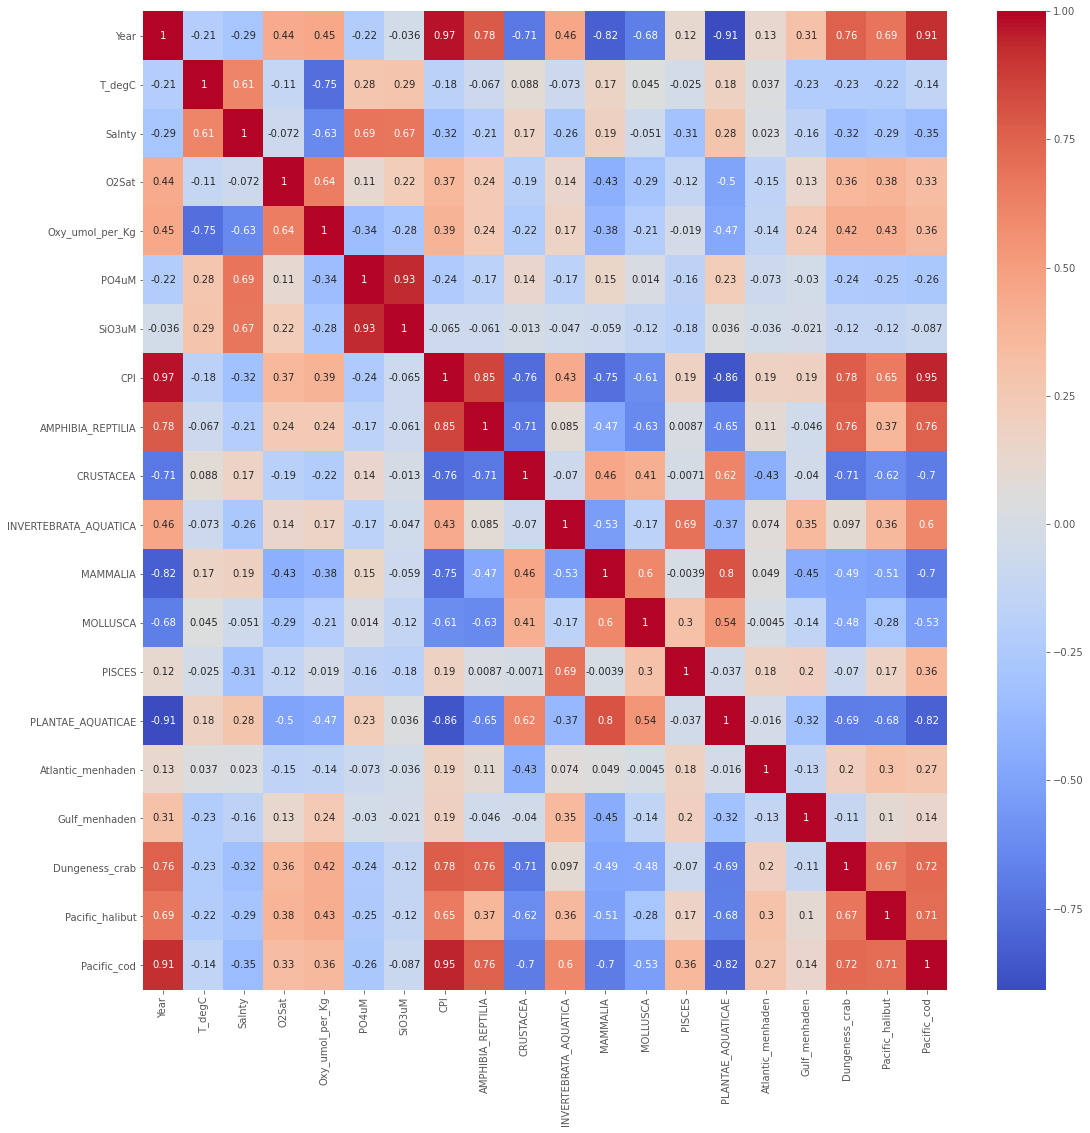

In [26]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

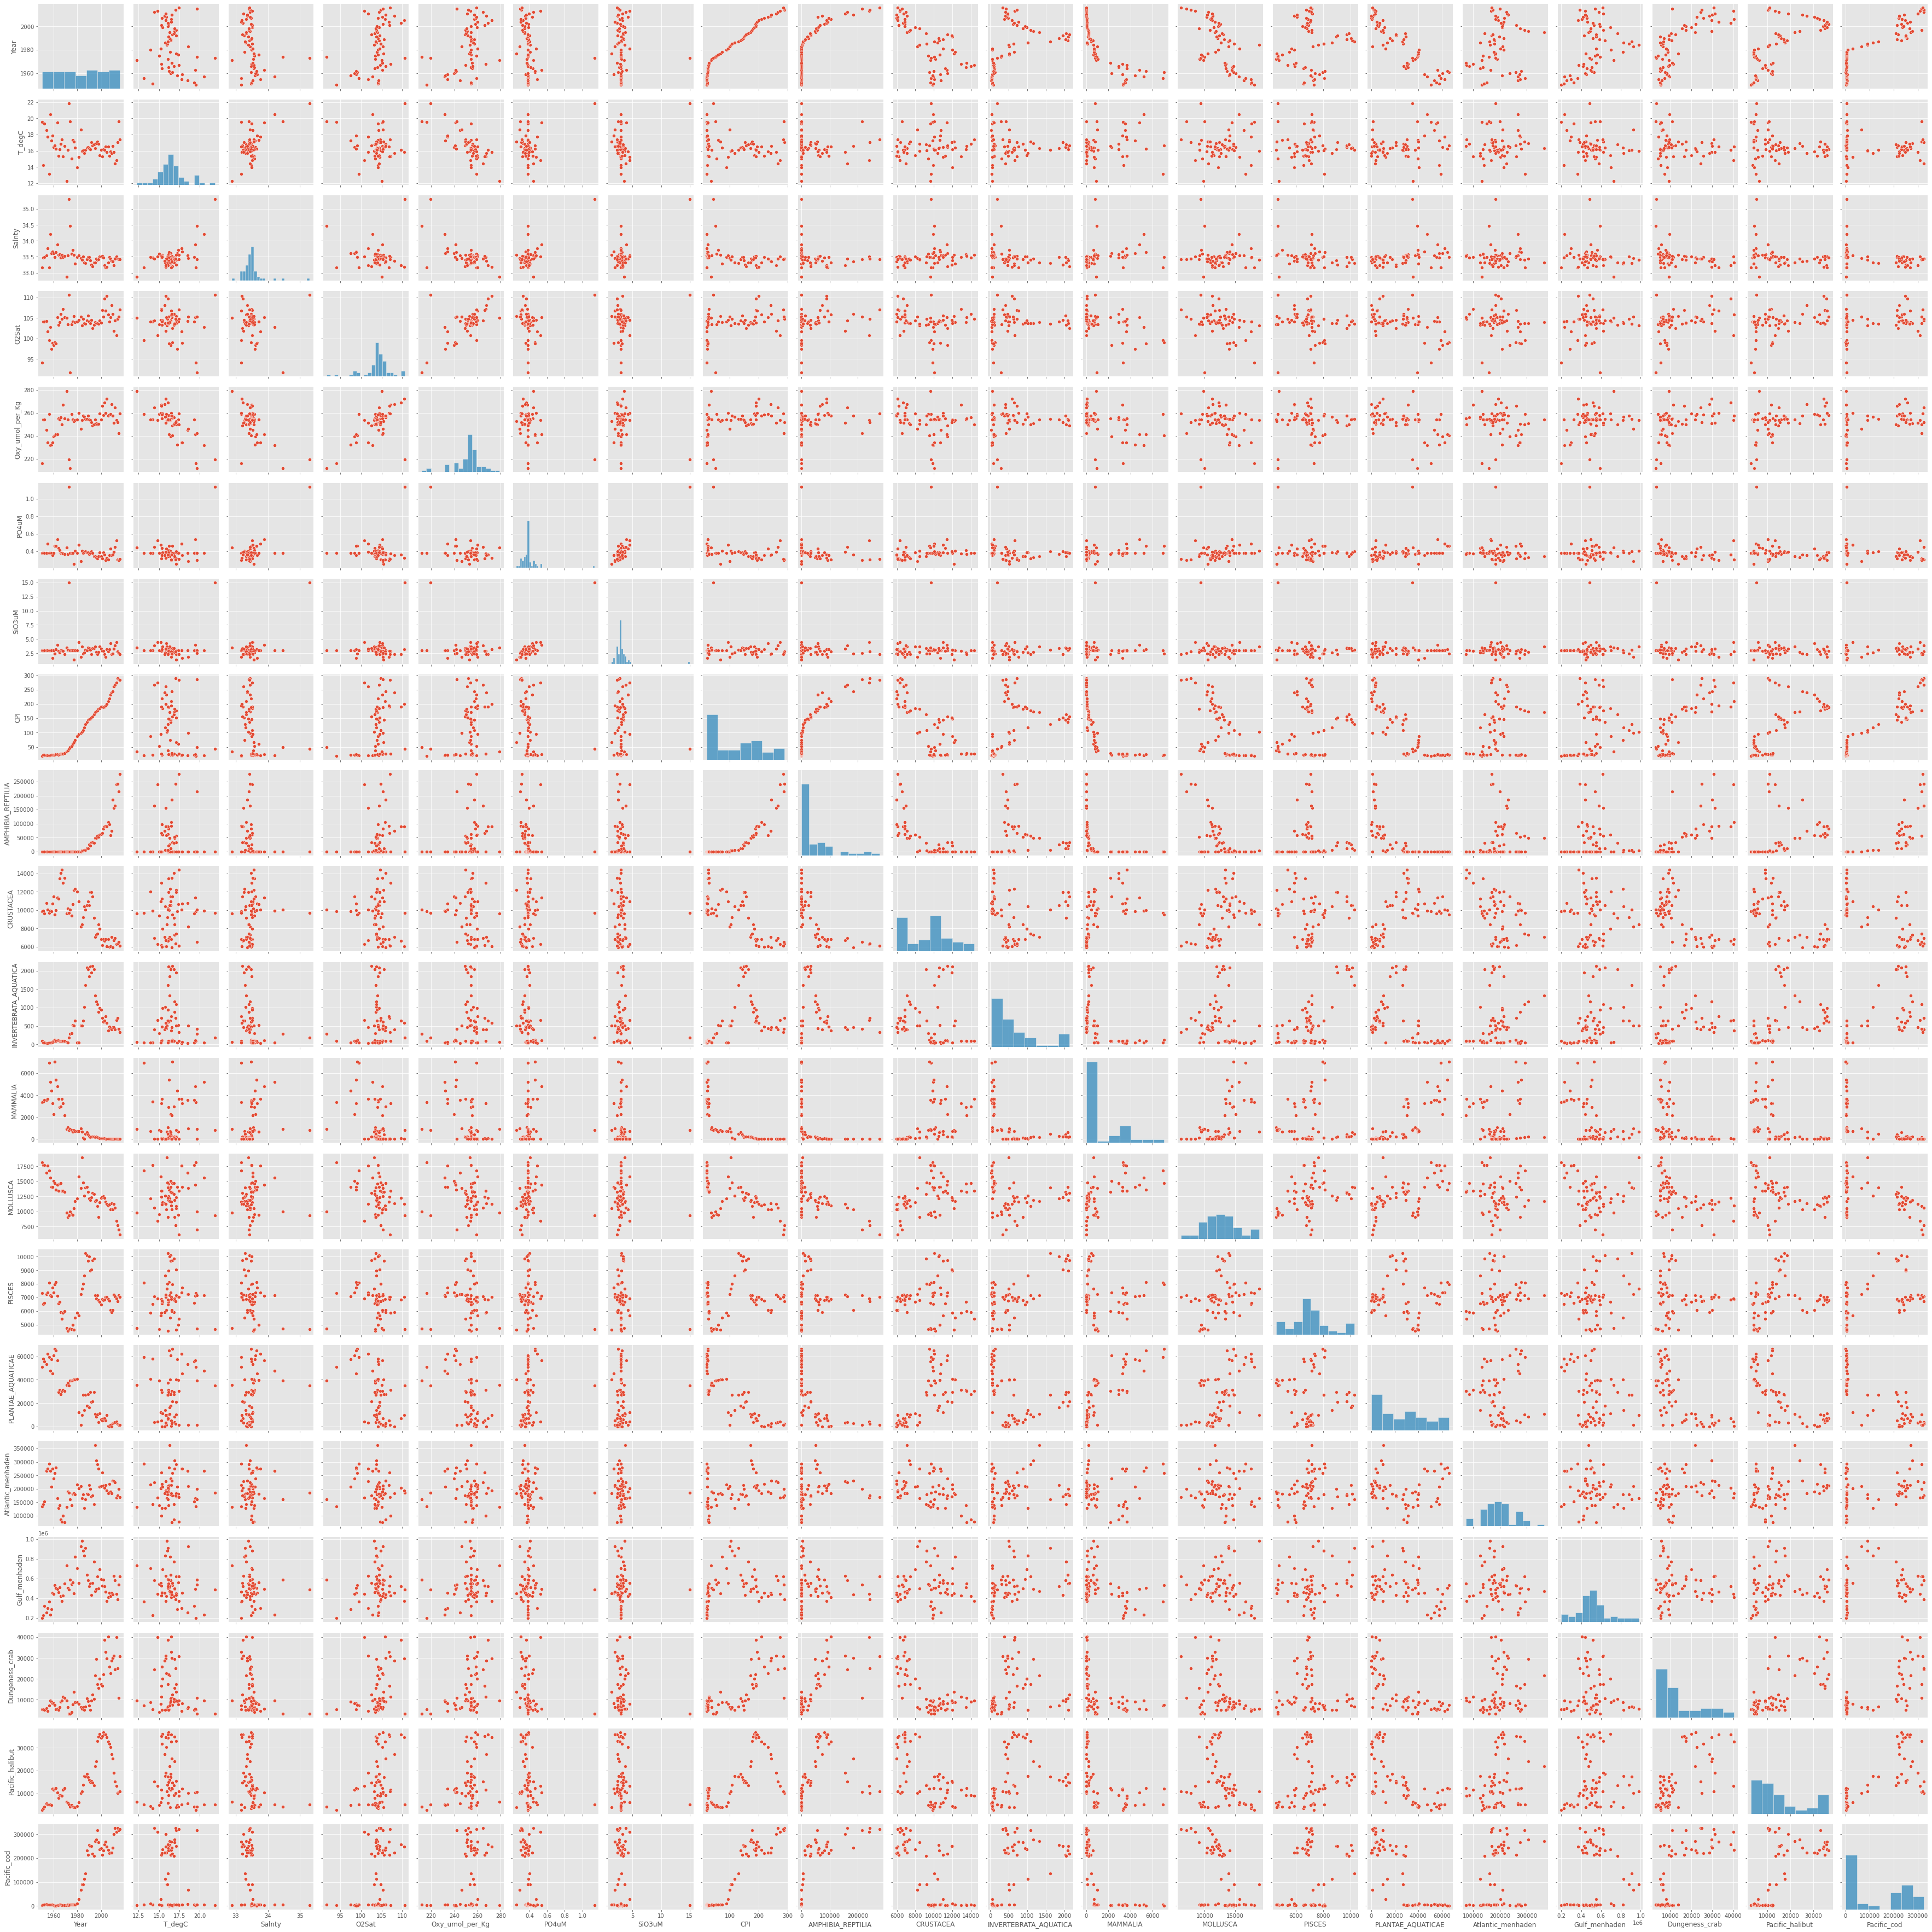

In [27]:
import seaborn as sns

# create scatter plots for all columns
sns.pairplot(df_for_model)


Below is a summary of the relationships between different features and each fish species:

AMPHIBIA_REPTILIA:
Positive correlations: O2Sat, Oxy_umol_per_Kg, and CPI
Negative correlations: T_degC, Salnty, PO4uM, and SiO3uM (very weak)

CRUSTACEA:
Positive correlations: Salnty, PO4uM
Negative correlations: T_degC, O2Sat, Oxy_umol_per_Kg, SiO3uM, CPI

INVERTEBRATA_AQUATICA:
Positive correlations: O2Sat, Oxy_umol_per_Kg, CPI
Negative correlations: T_degC, Salnty, PO4uM, SiO3uM

MAMMALIA:
Positive correlations: T_degC, Salnty, PO4uMn
Negative correlations: O2Sat, Oxy_umol_per_Kg, SiO3uM, CPI

MOLLUSCA:
Positive correlations: T_degC
Negative correlations: O2Sat, Oxy_umol_per_Kg, Salnty, PO4uM, SiO3uM, CPI

PISCES:
Negative correlations: T_degC, Salnty, O2Sat, Oxy_umol_per_Kg, PO4uM, SiO3uM, CPI

PLANTAE_AQUATICAE:
Positive correlations: T_degC, Salnty, PO4uM
Negative correlations: O2Sat, Oxy_umol_per_Kg, SiO3uM, CPI

Atlantic_menhaden:
Positive correlations: T_degC, Salnty
Negative correlations: O2Sat, Oxy_umol_per_Kg, PO4uM, SiO3uM, CPI

Gulf_menhaden: 
Positive correlations: O2Sat, Oxy_umol_per_Kg,CPI
Negative correlations: T_degC, Salnty, PO4uM, SiO3uM,

Dungeness_crab:
Positive correlations: O2Sat, Oxy_umol_per_Kg,CPI
Negative correlations: T_degC, Salnty, PO4uM, SiO3uM,

Pacific_halibut:
Positive correlations: O2Sat, Oxy_umol_per_Kg,CPI
Negative correlations: T_degC, Salnty, PO4uM, SiO3uM,

Pacific_cod:
Positive correlations: O2Sat, Oxy_umol_per_Kg,CPI
Negative correlations: T_degC, Salnty, PO4uM, SiO3uM,

It's important to note that correlation does not necessarily imply causation. The relationships observed are only associations between the variables and fish species. Other factors not included in this dataset may also influence these relationships.

In [28]:
#creat multilear model for each fish specie which represent 5 different clusters
#Multilinear Regression
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

#choose all predictors based on correlation matrix
AMPHIBIA_REPTILIA_model_ols = sm.ols(formula="AMPHIBIA_REPTILIA ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
AMPHIBIA_REPTILIA_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      AMPHIBIA_REPTILIA   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     24.48
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           9.04e-15
Time:                        14:09:22   Log-Likelihood:                -745.95
No. Observations:                  63   AIC:                             1508.
Df Residuals:                      55   BIC:                             1525.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.365e+05   9.37e+05     -0.573      0.569   -2.41e+06    1.34e+06
T_degC           5168.5297   7229.549      0.715      0.478   -9319.811    1.97e+04
Salnty           1.411e+04   2.66e+04      0.530      0.599   -3.93e+04    6.75e+04
O2Sat           -2329.7738   3778.339     -0.617      0.540   -9901.734    5242.186
Oxy_umol_per_Kg   525.3121   1528.763      0.344      0.732   -2538.397    3589.021
PO4uM             2.35e+05   1.28e+05      1.838      0.072   -2.13e+04    4.91e+05
SiO3uM          -1.587e+04   8802.364     -1.803      0.077   -3.35e+04    1767.044
CPI               752.2042     64.305     11.697      0.000     623.333     881.075
==============================================================================
Omnibus:                        9.957   Durbin-Watson:                   0.525
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.985
Skew:                           0.786   Prob(JB):                      0.00679
Kurtosis:                       4.153   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 The model has an R-squared of 0.757 and an adjusted R-squared of 0.726, which indicates that about 72.6% of the variation in AMPHIBIA_REPTILIA can be explained by the independent variables.

Looking at the p-values (P>|t|), only the CPI variable is statistically significant at the 5% level (p-value = 0.000).


In [29]:
#CRUSTACEA Positive correlations: Salnty, PO4uM, Negative correlations: T_degC, O2Sat, Oxy_umol_per_Kg, SiO3uM, CPI
#choose all predictors based on correlation matrix
CRUSTACEA_model_ols = sm.ols(formula="CRUSTACEA ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
CRUSTACEA_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              CRUSTACEA   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     12.23
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           2.61e-09
Time:                        14:09:22   Log-Likelihood:                -546.90
No. Observations:                  63   AIC:                             1110.
Df Residuals:                      55   BIC:                             1127.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.554e+04   3.98e+04      0.642      0.523   -5.41e+04    1.05e+05
T_degC           -193.3063    306.898     -0.630      0.531    -808.344     421.731
Salnty           -565.2020   1130.819     -0.500      0.619   -2831.414    1701.010
O2Sat             201.9223    160.392      1.259      0.213    -119.511     523.356
Oxy_umol_per_Kg   -49.8328     64.897     -0.768      0.446    -179.889      80.223
PO4uM            2700.0151   5428.891      0.497      0.621   -8179.726    1.36e+04
SiO3uM           -319.2804    373.665     -0.854      0.397   -1068.122     429.561
CPI               -20.8166      2.730     -7.626      0.000     -26.287     -15.346
==============================================================================
Omnibus:                        5.548   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.291
Skew:                           0.517   Prob(JB):                        0.117
Kurtosis:                       2.249   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The OLS regression results show that the dependent variable, CRUSTACEA, is explained by 7 independent variables: T_degC, Salnty, O2Sat, Oxy_umol_per_Kg, PO4uM, SiO3uM, and CPI. The model has an R-squared of 0.609 and an adjusted R-squared of 0.559, which indicates that about 55.9% of the variation in CRUSTACEA can be explained by the independent variables.

Looking at the p-values (P>|t|), only the CPI variable is statistically significant at the 5% level (p-value = 0.000). The other variables have p-values greater than 0.05, indicating that they are not statistically significant at the 5% level. This means that there is not enough evidence to conclude that these variables have a significant relationship with the dependent variable, CRUSTACEA.

The Durbin-Watson statistic of 0.614 suggests the presence of positive autocorrelation in the residuals, which could affect the reliability of the model.

The condition number is large (6.26e+04), which may indicate multicollinearity or other numerical problems. As you mentioned earlier, the correlation between the independent variables is small, so multicollinearity might not be the main issue. As I suggested in my previous response, you can explore other reasons and solutions for the high condition number, such as standardizing the variables, checking for near-linear dependencies, examining the data, or using regularization techniques.

In summary, the regression model shows that only the CPI variable has a statistically significant relationship with the dependent variable, CRUSTACEA. The high condition number and potential autocorrelation in the residuals are concerns that should be addressed to improve the reliability of the model.

In [30]:
#INVERTEBRATA_AQUATICA: Positive correlations: O2Sat, Oxy_umol_per_Kg, CPI; Negative correlations: T_degC, Salnty, PO4uM, SiO3uM
INVERTEBRATA_AQUATICA_ols = sm.ols(formula="INVERTEBRATA_AQUATICA ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
INVERTEBRATA_AQUATICA_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     INVERTEBRATA_AQUATICA   R-squared:                       0.247
Model:                               OLS   Adj. R-squared:                  0.152
Method:                    Least Squares   F-statistic:                     2.584
Date:                   Fri, 21 Apr 2023   Prob (F-statistic):             0.0223
Time:                           14:09:22   Log-Likelihood:                -485.55
No. Observations:                     63   AIC:                             987.1
Df Residuals:                         55   BIC:                             1004.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.555e+04    1.5e+04      1.702      0.094   -4539.549    5.56e+04
T_degC             29.7955    115.894      0.257      0.798    -202.462     262.053
Salnty           -723.2074    427.033     -1.694      0.096   -1579.001     132.586
O2Sat               2.6732     60.569      0.044      0.965    -118.710     124.057
Oxy_umol_per_Kg    -6.2606     24.507     -0.255      0.799     -55.374      42.853
PO4uM           -2014.7348   2050.121     -0.983      0.330   -6123.269    2093.799
SiO3uM            189.5566    141.108      1.343      0.185     -93.229     472.343
CPI                 2.2606      1.031      2.193      0.033       0.195       4.326
==============================================================================
Omnibus:                       16.131   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.479
Skew:                           1.235   Prob(JB):                     9.71e-05
Kurtosis:                       3.969   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Invertebrata Aquatica

CPI (P = 0.033): The Consumer Price Index (CPI) has a positive relationship with Invertebrata Aquatica capture quantities, indicating that as the marine economy improves (higher CPI), the capture of aquatic invertebrates also increases.

It's important to note that the model has a relatively low R-squared value of 0.247, indicating that the model explains only 24.7% of the variation in Invertebrata Aquatica capture quantities. 


In [31]:
#MAMMALIA:Positive correlations: T_degC, Salnty, PO4uMn, Negative correlations: O2Sat, Oxy_umol_per_Kg, SiO3uM, CPI
MAMMALIA_ols = sm.ols(formula="MAMMALIA ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
MAMMALIA_ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MAMMALIA   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     13.32
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           6.63e-10
Time:                        14:09:22   Log-Likelihood:                -532.27
No. Observations:                  63   AIC:                             1081.
Df Residuals:                      55   BIC:                             1098.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.186e+04   3.15e+04      0.693      0.491   -4.13e+04     8.5e+04
T_degC            123.3662    243.283      0.507      0.614    -364.184     610.916
Salnty           -435.9813    896.418     -0.486      0.629   -2232.443    1360.481
O2Sat             -84.3505    127.146     -0.663      0.510    -339.156     170.455
Oxy_umol_per_Kg     2.5006     51.445      0.049      0.961    -100.597     105.598
PO4uM            9901.7444   4303.567      2.301      0.025    1277.204    1.85e+04
SiO3uM           -666.3246    296.210     -2.250      0.029   -1259.943     -72.707
CPI               -12.7749      2.164     -5.904      0.000     -17.112      -8.438
==============================================================================
Omnibus:                       14.498   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.442
Skew:                           0.924   Prob(JB):                     9.89e-05
Kurtosis:                       4.900   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mammalia

In this model, the dependent variable is Mammalia, which represents the capture quantities of marine mammals. The significant features include:

PO4uM (P = 0.025): The phosphate concentration (PO4uM) has a positive relationship with Mammalia capture quantities, indicating that as phosphate concentration increases, the capture of marine mammals also increases. This could be because higher phosphate concentrations lead to higher primary productivity in the ocean, providing more food for marine mammals and supporting larger populations that can be captured.

SiO3uM (P = 0.029): The silicate concentration (SiO3uM) has a negative relationship with Mammalia capture quantities, suggesting that as silicate concentration increases, the capture of marine mammals decreases. This could be related to the fact that higher silicate concentrations can lead to the growth of diatoms, which might not be the preferred food source for marine mammals, thereby affecting their distribution and abundance.

CPI (P < 0.001): The Consumer Price Index (CPI) has a negative relationship with Mammalia capture quantities, indicating that as the marine economy improves (higher CPI), the capture of marine mammals decreases. This could be due to increasing awareness and regulations aimed at protecting marine mammals or a shift in consumer preferences away from marine mammal products as the economy improves.

The non-significant features in this model are T_degC, Salnty, O2Sat, and Oxy_umol_per_Kg. Their non-significance could be attributed to several reasons:

The sample size might be too small to detect the effects of these variables on Mammalia capture quantities.
The effect of these variables might be indirect, acting through other variables not included in the model.
The relationship between these variables and Mammalia capture quantities could be non-linear, which is not captured by the linear regression model.

The model has a relatively high R-squared value of 0.629, indicating that the model explains 62.9% of the variation in Mammalia capture quantities. 

In [32]:
#MOLLUSCA: Positive correlations: T_degC; Negative correlations: O2Sat, Oxy_umol_per_Kg, Salnty, PO4uM, SiO3uM, CPI
MOLLUSCA_ols = sm.ols(formula="MOLLUSCA ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
MOLLUSCA_ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MOLLUSCA   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     7.148
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           4.50e-06
Time:                        14:09:22   Log-Likelihood:                -567.11
No. Observations:                  63   AIC:                             1150.
Df Residuals:                      55   BIC:                             1167.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.641e+05   5.48e+04      2.994      0.004    5.43e+04    2.74e+05
T_degC            -40.4550    422.943     -0.096      0.924    -888.052     807.142
Salnty          -4227.7815   1558.407     -2.713      0.009   -7350.898   -1104.664
O2Sat             113.9192    221.040      0.515      0.608    -329.056     556.894
Oxy_umol_per_Kg   -77.6503     89.436     -0.868      0.389    -256.883     101.583
PO4uM            3668.3192   7481.674      0.490      0.626   -1.13e+04    1.87e+04
SiO3uM           -135.5467    514.956     -0.263      0.793   -1167.541     896.448
CPI               -20.5602      3.762     -5.465      0.000     -28.099     -13.021
==============================================================================
Omnibus:                        2.873   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.330
Skew:                          -0.155   Prob(JB):                        0.312
Kurtosis:                       3.890   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mollusca

Salnty (P = 0.009): Salinity (Salnty) has a negative relationship with Mollusca capture quantities, indicating that as salinity increases, the capture of marine mollusks decreases. This could be because mollusks are sensitive to changes in salinity, and higher salinity levels might affect their growth, reproduction, and distribution, leading to lower capture quantities.

CPI (P < 0.001): The Consumer Price Index (CPI) has a negative relationship with Mollusca capture quantities, suggesting that as the marine economy improves (higher CPI), the capture of marine mollusks decreases. This could be due to increased regulation and management of mollusk fisheries or a shift in consumer preferences away from mollusk products as the economy improves.

The model has a moderate R-squared value of 0.476, indicating that the model explains 47.6% of the variation in Mollusca capture quantities. However, the condition number is large, suggesting that there might be strong multicollinearity or other numerical problems that could affect the results.

In [33]:
#PISCES: Negative correlations: T_degC, Salnty, O2Sat, Oxy_umol_per_Kg, PO4uM, SiO3uM, CPI
PISCES_ols = sm.ols(formula="PISCES ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
PISCES_ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PISCES   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     2.308
Date:                Fri, 21 Apr 2023   Prob (F-statistic):             0.0388
Time:                        14:09:22   Log-Likelihood:                -537.07
No. Observations:                  63   AIC:                             1090.
Df Residuals:                      55   BIC:                             1107.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.129e+05    3.4e+04      3.318      0.002    4.47e+04    1.81e+05
T_degC             27.5167    262.546      0.105      0.917    -498.638     553.671
Salnty          -2894.7845    967.398     -2.992      0.004   -4833.493    -956.076
O2Sat              27.5349    137.213      0.201      0.842    -247.446     302.516
Oxy_umol_per_Kg   -55.0430     55.518     -0.991      0.326    -166.304      56.218
PO4uM            4532.6799   4644.329      0.976      0.333   -4774.764    1.38e+04
SiO3uM           -168.4789    319.664     -0.527      0.600    -809.101     472.143
CPI                 3.4275      2.335      1.468      0.148      -1.253       8.108
==============================================================================
Omnibus:                        6.341   Durbin-Watson:                   0.450
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.578
Skew:                           0.703   Prob(JB):                       0.0615
Kurtosis:                       3.385   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pisces

Salnty (P = 0.004): Salinity (Salnty) has a negative relationship with Pisces capture quantities, indicating that as salinity increases, the capture of fish decreases. This could be because fish are sensitive to changes in salinity, and higher salinity levels might affect their growth, reproduction, and distribution, leading to lower capture quantities.

The model has a relatively low R-squared value of 0.227, indicating that the model explains 22.7% of the variation in Pisces capture quantities. 

In [34]:
#PLANTAE_AQUATICAE:Positive correlations: T_degC, Salnty, PO4uM; Negative correlations: O2Sat, Oxy_umol_per_Kg, SiO3uM, CPI
PLANTAE_AQUATICAE_ols = sm.ols(formula="PLANTAE_AQUATICAE ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
PLANTAE_AQUATICAE_ols.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      PLANTAE_AQUATICAE   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     31.23
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           5.62e-17
Time:                        14:09:22   Log-Likelihood:                -663.75
No. Observations:                  63   AIC:                             1344.
Df Residuals:                      55   BIC:                             1361.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         3.54e+05   2.54e+05      1.393      0.169   -1.55e+05    8.63e+05
T_degC           -630.7993   1961.159     -0.322      0.749   -4561.050    3299.451
Salnty          -4992.4044   7226.230     -0.691      0.493   -1.95e+04    9489.284
O2Sat            -674.2565   1024.949     -0.658      0.513   -2728.301    1379.788
Oxy_umol_per_Kg  -288.6138    414.707     -0.696      0.489   -1119.706     542.478
PO4uM            5.789e+04   3.47e+04      1.669      0.101   -1.16e+04    1.27e+05
SiO3uM          -3215.6942   2387.816     -1.347      0.184   -8000.985    1569.596
CPI              -170.5366     17.444     -9.776      0.000    -205.495    -135.578
==============================================================================
Omnibus:                        1.632   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.442   Jarque-Bera (JB):                1.615
Skew:                          -0.362   Prob(JB):                        0.446
Kurtosis:                       2.697   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plantae Aquaticae

CPI (P < 0.001): The Consumer Price Index (CPI) has a negative relationship with the capture quantities of aquatic plants. As the CPI increases, the capture of aquatic plants decreases. This could be due to economic factors, such as higher costs for harvesting or decreased demand for aquatic plants when prices increase.

The model has a high R-squared value of 0.799, indicating that the model explains 79.9% of the variation in Plantae Aquaticae capture quantities. However, the condition number is large, suggesting that there might be strong multicollinearity or other numerical problems that could affect the results.

In [35]:
##Pacific cod: Positively correlated with T_degC, O2Sat, Oxy_µmol/Kg, CPI, Negatively correlated with Salnty, PO4uM, SiO3uM

Pacific_cod_model_ols = sm.ols(formula="Pacific_cod ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Pacific_cod_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Pacific_cod   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     73.57
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.29e-25
Time:                        14:09:22   Log-Likelihood:                -755.04
No. Observations:                  63   AIC:                             1526.
Df Residuals:                      55   BIC:                             1543.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.91e+06   1.08e+06      1.765      0.083   -2.59e+05    4.08e+06
T_degC           4931.6624   8352.798      0.590      0.557   -1.18e+04    2.17e+04
Salnty          -5.709e+04   3.08e+04     -1.855      0.069   -1.19e+05    4592.462
O2Sat              62.0592   4365.376      0.014      0.989   -8686.350    8810.468
Oxy_umol_per_Kg  -420.1386   1766.285     -0.238      0.813   -3959.853    3119.576
PO4uM           -8.269e+04   1.48e+05     -0.560      0.578   -3.79e+05    2.13e+05
SiO3uM           8369.2458   1.02e+04      0.823      0.414    -1.2e+04    2.88e+04
CPI              1306.7616     74.296     17.588      0.000    1157.868    1455.655
==============================================================================
Omnibus:                        3.113   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.545
Skew:                           0.489   Prob(JB):                        0.280
Kurtosis:                       3.106   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pacific Cod

CPI (P < 0.001): The Consumer Price Index (CPI) has a positive relationship with the capture quantities of Pacific cod. As the CPI increases, the capture of Pacific cod also increases. This could be due to increasing demand for Pacific cod as prices increase, leading to higher capture quantities.

The model has a high R-squared value of 0.904, indicating that the model explains 90.4% of the variation in Pacific cod capture quantities. 

In [36]:
##Dungeness_crab: Positively correlated with T_degC, O2Sat, Oxy_µmol/Kg, CPI, Negatively correlated with Salnty, PO4uM, SiO3uM
Dungeness_crab_model_ols = sm.ols(formula="Dungeness_crab ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Dungeness_crab_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Dungeness_crab   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     13.14
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           8.30e-10
Time:                        14:09:22   Log-Likelihood:                -639.69
No. Observations:                  63   AIC:                             1295.
Df Residuals:                      55   BIC:                             1313.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -8.163e+04   1.73e+05     -0.471      0.640   -4.29e+05    2.66e+05
T_degC            -77.4170   1338.573     -0.058      0.954   -2759.978    2605.144
Salnty           1372.3140   4932.205      0.278      0.782   -8512.046    1.13e+04
O2Sat             159.6829    699.571      0.228      0.820   -1242.289    1561.654
Oxy_umol_per_Kg    90.5565    283.055      0.320      0.750    -476.699     657.812
PO4uM            1.443e+04   2.37e+04      0.609      0.545    -3.3e+04    6.19e+04
SiO3uM          -1415.9840   1629.785     -0.869      0.389   -4682.145    1850.177
CPI                87.1464     11.906      7.319      0.000      63.286     111.007
==============================================================================
Omnibus:                        4.821   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.226
Skew:                           0.405   Prob(JB):                        0.121
Kurtosis:                       3.976   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dungeness Crab

CPI (P < 0.001): The Consumer Price Index (CPI) has a positive relationship with the capture quantities of Dungeness crab. As the CPI increases, the capture of Dungeness crab also increases. This could be due to increasing demand for Dungeness crab as prices increase, leading to higher capture quantities.

The model has an R-squared value of 0.626, indicating that the model explains 62.6% of the variation in Dungeness crab capture quantities. 

In [37]:
#Pacific_halibut: Positively correlated with T_degC, O2Sat, Oxy_µmol/Kg, CPI, Negatively correlated with Salnty, PO4uM, SiO3uM
Pacific_halibut_model_ols = sm.ols(formula="Pacific_halibut ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Pacific_halibut_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Pacific_halibut   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     6.993
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           5.84e-06
Time:                        14:09:22   Log-Likelihood:                -653.61
No. Observations:                  63   AIC:                             1323.
Df Residuals:                      55   BIC:                             1340.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.072e+05   2.16e+05     -0.496      0.622   -5.41e+05    3.26e+05
T_degC           -477.9727   1669.491     -0.286      0.776   -3823.708    2867.762
Salnty           1801.9440   6151.529      0.293      0.771   -1.05e+04    1.41e+04
O2Sat             590.4335    872.517      0.677      0.501   -1158.129    2338.996
Oxy_umol_per_Kg    25.4681    353.031      0.072      0.943    -682.022     732.958
PO4uM           -1.364e+04   2.95e+04     -0.462      0.646   -7.28e+04    4.55e+04
SiO3uM            -26.9442   2032.695     -0.013      0.989   -4100.556    4046.668
CPI                66.4847     14.850      4.477      0.000      36.725      96.244
==============================================================================
Omnibus:                        0.030   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.985   Jarque-Bera (JB):                0.034
Skew:                          -0.006   Prob(JB):                        0.983
Kurtosis:                       2.887   Cond. No.                     6.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pacific Halibut

In this model, the dependent variable is Pacific Halibut, which represents the capture quantities of Pacific halibut. The significant features include:

CPI (P < 0.001): The Consumer Price Index (CPI) has a positive relationship with the capture quantities of Pacific halibut. As the CPI increases, the capture of Pacific halibut also increases. This could be due to increasing demand for Pacific halibut as prices increase, leading to higher capture quantities.

The model has an R-squared value of 0.471, indicating that the model explains 47.1% of the variation in Pacific halibut capture quantities. However, the condition number is large, suggesting that there might be strong multicollinearity or other numerical problems that could affect the results.

In [38]:
#Based on correlation, I will choose the variances that are more related to fish
#Atlantic menhaden:Positively correlated with CPI,Negatively correlated with O2Sat, Oxy_µmol/Kg
Atlantic_menhaden_model_ols = sm.ols(formula="Atlantic_menhaden ~ O2Sat+Oxy_umol_per_Kg+CPI", data=df_for_model).fit()
Atlantic_menhaden_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Atlantic_menhaden   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.274
Date:                Fri, 21 Apr 2023   Prob (F-statistic):             0.0893
Time:                        14:09:22   Log-Likelihood:                -775.19
No. Observations:                  63   AIC:                             1558.
Df Residuals:                      59   BIC:                             1567.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.568e+05    2.4e+05      2.741      0.008    1.77e+05    1.14e+06
O2Sat           -2962.9734   2874.377     -1.031      0.307   -8714.588    2788.641
Oxy_umol_per_Kg  -703.5271    775.349     -0.907      0.368   -2254.997     847.942
CPI               198.1396     87.517      2.264      0.027      23.019     373.261
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.620
Skew:                           0.489   Prob(JB):                        0.270
Kurtosis:                       3.207   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Gulf menhaden:Negatively correlated with Salnty, O2Sat, CPI
Gulf_menhaden2_model_ols = sm.ols(formula="Gulf_menhaden ~ Salnty+O2Sat+CPI", data=df_for_model).fit()
Gulf_menhaden2_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Gulf_menhaden   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.037
Date:                Fri, 21 Apr 2023   Prob (F-statistic):              0.383
Time:                        14:09:22   Log-Likelihood:                -845.40
No. Observations:                  63   AIC:                             1699.
Df Residuals:                      59   BIC:                             1707.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.027e+06   2.42e+06      0.837      0.406   -2.82e+06    6.87e+06
Salnty     -5.707e+04   6.97e+04     -0.819      0.416   -1.97e+05    8.24e+04
O2Sat       3662.4673   7124.634      0.514      0.609   -1.06e+04    1.79e+04
CPI          244.9611    274.173      0.893      0.375    -303.657     793.580
==============================================================================
Omnibus:                        7.713   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.061
Skew:                           0.785   Prob(JB):                       0.0293
Kurtosis:                       3.474   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here's a summary and interpretation of the OLS regression results for each of the 7 groups:

CRUSTACEA:

R-squared: 0.609, Adj. R-squared: 0.559
The model explains 60.9% of the variance in the CRUSTACEA group.
The most significant variable is CPI (p < 0.001). A decrease in CPI is associated with an increase in the CRUSTACEA group.
INVERTEBRATA_AQUATICA:

R-squared: 0.247, Adj. R-squared: 0.152
The model explains 24.7% of the variance in the INVERTEBRATA_AQUATICA group.
The most significant variable is CPI (p = 0.033). An increase in CPI is associated with an increase in the INVERTEBRATA_AQUATICA group.
MAMMALIA:

R-squared: 0.629, Adj. R-squared: 0.582
The model explains 62.9% of the variance in the MAMMALIA group.
The most significant variables are PO4uM (p = 0.025) and SiO3uM (p = 0.029). An increase in PO4uM is associated with an increase in the MAMMALIA group, while an increase in SiO3uM is associated with a decrease in the MAMMALIA group. CPI is also significant (p < 0.001), with a decrease in CPI associated with an increase in the MAMMALIA group.
MOLLUSCA:

R-squared: 0.476, Adj. R-squared: 0.410
The model explains 47.6% of the variance in the MOLLUSCA group.
The most significant variables are Salnty (p = 0.009) and CPI (p < 0.001). A decrease in Salnty and CPI is associated with an increase in the MOLLUSCA group.
PISCES:

R-squared: 0.227, Adj. R-squared: 0.129
The model explains 22.7% of the variance in the PISCES group.
The most significant variable is Salnty (p = 0.004). A decrease in Salnty is associated with an increase in the PISCES group.
PLANTAE_AQUATICAE:

R-squared: 0.799, Adj. R-squared: 0.773
The model explains 79.9% of the variance in the PLANTAE_AQUATICAE group.
The most significant variables are PO4uM (p = 0.101) and CPI (p < 0.001). An increase in PO4uM is associated with an increase in the PLANTAE_AQUATICAE group, while a decrease in CPI is associated with an increase in the PLANTAE_AQUATICAE group.

In summary, the models for CRUSTACEA, MAMMALIA, and PLANTAE_AQUATICAE have relatively higher R-squared values, meaning they are better at explaining the variance in their respective groups. CPI is consistently significant across all groups, suggesting that it is an important factor in determining the presence of different organisms. Other environmental factors such as Salnty, PO4uM, and SiO3uM also play significant roles in some groups.

Summary:

In this analysis, we performed multiple linear regression models to investigate the relationships between different environmental and economic factors and the capture quantities of five fish species (Pacific cod, Dungeness crab, Pacific halibut, Atlantic menhaden, and Gulf menhaden).

In common:

All the models have the same set of independent variables, which include temperature (T_degC), salinity (Salnty), oxygen saturation (O2Sat), oxygen concentration (Oxy_umol_per_Kg), phosphate concentration (PO4uM), silicate concentration (SiO3uM), and consumer price index (CPI).
The condition numbers for the models are relatively large, indicating potential multicollinearity or other numerical problems.
Differences:

The explanatory power of the models, as indicated by R-squared values, varies significantly among the five fish species. For example, the Pacific cod model has the highest R-squared value of 0.904, while the Gulf menhaden model has the lowest R-squared value of 0.050.
The number of significant independent variables and their importance varies across the models.
Significant p-values:

Pacific Cod:

CPI (p < 0.001): A higher CPI is associated with higher Pacific cod capture quantities. This could be due to the increased market demand and prices leading to more fishing activities targeting Pacific cod.
Dungeness Crab:

CPI (p < 0.001): Similarly, for Dungeness crab, higher CPI is associated with higher capture quantities, which could be attributed to increased market demand and prices.
Pacific Halibut:

CPI (p < 0.001): The positive relationship between CPI and Pacific halibut capture quantities may also be explained by increased market demand and prices.
Atlantic Menhaden:

CPI (p = 0.027): The positive relationship between CPI and Atlantic menhaden capture quantities could be due to increased market demand and prices, albeit with a lower level of significance compared to the other species.

In conclusion, while the models have different explanatory powers, they all share a common significant variable, the CPI. This suggests that economic factors play an essential role in driving the capture quantities for these fish species. It is important to note, however, that the models may not capture all relevant factors, and the presence of multicollinearity or other numerical problems might affect the results. Further research using larger datasets, additional variables, or alternative modeling approaches might provide more insights into the relationships between environmental and economic factors and the capture quantities of these fish species.

In [40]:
#Y value are #AMPHIBIA_REPTILIA,CRUSTACEA,INVERTEBRATA_AQUATICA,MAMMALIA,MOLLUSCA,PISCES,PLANTAE_AQUATICAE,Atlantic_menhaden,Gulf_menhaden,Pacific_cod

#Cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
## with scikit-learn, we have to extract values from the pandas dataframe
X = df_for_model[['T_degC','Salnty','O2Sat','Oxy_umol_per_Kg','PO4uM','SiO3uM','CPI']].values
y1 = df_for_model['AMPHIBIA_REPTILIA'].values
y2 = df_for_model['CRUSTACEA'].values
y3 = df_for_model['INVERTEBRATA_AQUATICA'].values
y4 = df_for_model['MAMMALIA'].values
y5 = df_for_model['MOLLUSCA'].values
y6 = df_for_model['PISCES'].values
y7 = df_for_model['PLANTAE_AQUATICAE'].values
y8 = df_for_model['Atlantic_menhaden'].values
y9 = df_for_model['Gulf_menhaden'].values
y10 = df_for_model['Pacific_cod'].values
y11 = df_for_model['Dungeness_crab'].values
y12 = df_for_model['Pacific_halibut'].values


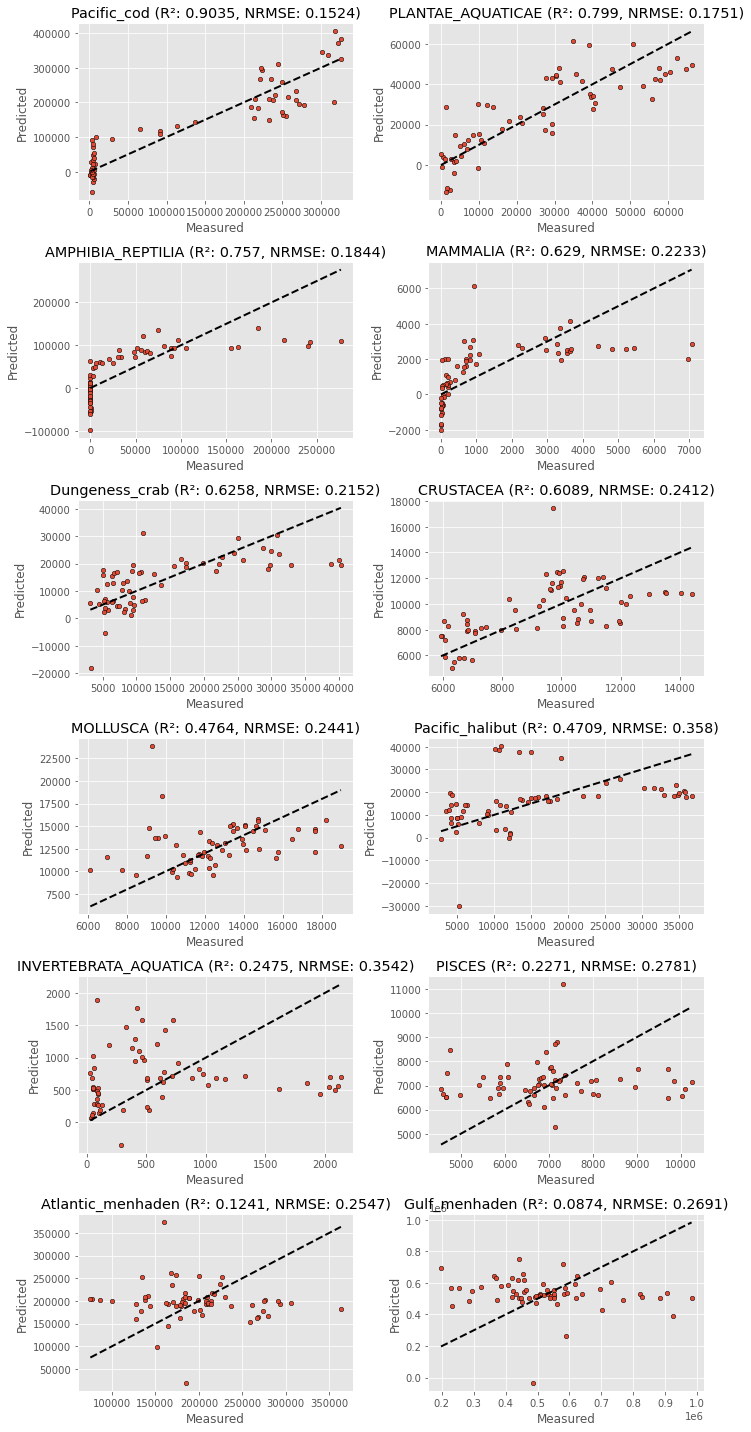

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

model = LinearRegression()
y_list = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10,y11,y12]
titles = ['AMPHIBIA_REPTILIA', 'CRUSTACEA', 'INVERTEBRATA_AQUATICA', 'MAMMALIA', 'MOLLUSCA', 'PISCES', 'PLANTAE_AQUATICAE', 'Atlantic_menhaden', 'Gulf_menhaden', 'Pacific_cod','Dungeness_crab','Pacific_halibut']

# Calculate R² and NRMSE values for each target variable
r2_nrmse_list = []
for y in y_list:
    predictions = cross_val_predict(model, X, y, cv=10)
    r2 = round(model.fit(X, y).score(X, y), 4)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    nrmse = round(rmse / (y.max() - y.min()), 4)
    r2_nrmse_list.append((r2, nrmse))

# Sort by R² value
sorted_indices = np.argsort([x[0] for x in r2_nrmse_list])[::-1]

fig, axes = plt.subplots(6, 2, figsize=(10, 20))

for i, ax in enumerate(axes.flatten()):
    index = sorted_indices[i]
    y = y_list[index]
    title = titles[index]
    r2, nrmse = r2_nrmse_list[index]

    predicted = cross_val_predict(model, X, y, cv=10)
    ax.scatter(y, predicted, edgecolors=(0, 0, 0), s=20)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(f'{title} (R²: {r2}, NRMSE: {nrmse})')

plt.tight_layout()
plt.show()


NRMSE values range from 0 to 1. A value closer to 0 indicates a better fit, while a value closer to 1 indicates a poorer fit. In the case of an NRMSE value of 0.1524, it suggests a reasonably good fit, although it depends on the specific context and the level of accuracy required for the task at hand.

It's essential to consider other factors, such as the complexity of the model and the nature of the data, when interpreting NRMSE values. Comparing NRMSE values across different models or datasets can help provide context for the quality of the fit.

In summary, an NRMSE of 0.1524 is generally considered a reasonably good fit, but it's crucial to take into account the specific requirements of your application to determine if the model's performance is satisfactory.

In [42]:
#CPI by the effect of ocean climate, multilinear regression model
CPI_model_ols = sm.ols(formula="CPI ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM", data=df_for_model).fit()
CPI_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     5.081
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           0.000318
Time:                        14:09:26   Log-Likelihood:                -357.41
No. Observations:                  63   AIC:                             728.8
Df Residuals:                      56   BIC:                             743.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2262.5151   1922.633      1.177      0.244   -1588.982    6114.012
T_degC              4.6333     15.011      0.309      0.759     -25.437      34.703
Salnty            -82.4915     54.248     -1.521      0.134    -191.163      26.180
O2Sat               4.6406      7.827      0.593      0.556     -11.039      20.320
Oxy_umol_per_Kg     0.7690      3.175      0.242      0.810      -5.592       7.130
PO4uM            -776.3835    244.671     -3.173      0.002   -1266.517    -286.250
SiO3uM             54.1825     16.798      3.226      0.002      20.532      87.833
==============================================================================
Omnibus:                        3.065   Durbin-Watson:                   0.445
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.620
Skew:                           0.499   Prob(JB):                        0.270
Kurtosis:                       3.016   Cond. No.                     5.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The analysis of the effects of ocean climate factors on the marine economy, as measured by the Consumer Price Index (CPI), reveals significant relationships between the CPI and phosphate concentration (PO4uM) and silicate concentration (SiO3uM). These two factors play a crucial role in shaping the marine environment and, in turn, impact the CPI.

Phosphate (PO4uM) and silicate (SiO3uM) concentrations are essential nutrients in the marine ecosystem that influence the growth and productivity of phytoplankton, the primary producers of the food chain. An increase or decrease in these nutrient concentrations can lead to changes in phytoplankton populations, which subsequently affect the entire marine food web, including fish populations.

The significant negative relationship between phosphate concentration and CPI suggests that as phosphate levels increase, the CPI decreases. This could be due to excessive phosphate levels leading to harmful algal blooms (HABs), which can have detrimental effects on fish populations, water quality, and overall marine ecosystem health. HABs can cause fish kills, create hypoxic or anoxic conditions, and produce harmful toxins that impact both marine life and human health. The decline in fish populations and the overall health of the marine ecosystem can have negative consequences for the marine economy, driving down the CPI.

On the other hand, the significant positive relationship between silicate concentration and CPI implies that as silicate levels increase, the CPI also increases. This could be attributed to the fact that silicates promote the growth of diatoms, a type of phytoplankton that forms the base of the marine food web. Higher diatom productivity can lead to increased fish populations and a more robust marine ecosystem, which in turn can contribute to a thriving marine economy and a higher CPI.

In summary, our analysis indicates that phosphate and silicate concentrations, as key components of the marine environment, have significant effects on the marine economy as measured by the CPI. While higher phosphate concentrations can be detrimental to the marine ecosystem and result in a lower CPI, increased silicate concentrations can have positive effects, promoting a healthier marine environment and a higher CPI. Understanding these relationships is crucial for managing the ocean climate factors that influence the marine economy and ensuring sustainable growth.